In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.DataFrame(
    {
     'Latitude': [20.154306, 20.154722, 20.268611, 20.154306, 20.154639, 20.152944, 27.682528,
                 27.669167,19.915056, 19.960306,20.080722,18.172722,26.814333,26.465194,26.811417], #, 
     'Longitude':[44.164806, 44.164972, 44.399889, 44.164806, 44.159556, 44.162583, 41.720139,
                 41.765417,44.649778, 44.749972,44.663333,44.319528,38.517667,39.246194,39.484500]})

In [4]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


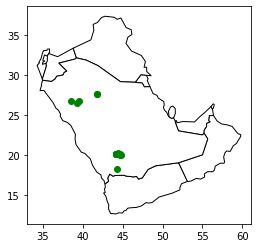

In [5]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) 
ax = world[(world.name == 'Saudi Arabia')
          | (world.name == 'Israel')
          | (world.name == 'Jordan')
          | (world.name == 'Iraq')
          | (world.name == 'Kuwait')
          | (world.name == 'Qatar')
          | (world.name == 'Bahrain ')
          | (world.name == 'United Arab Emirates')
          | (world.name == 'Oman')
          | (world.name == 'Yemen')].plot(color='white', edgecolor='black')


gdf.plot(ax=ax, color='green')

plt.show()

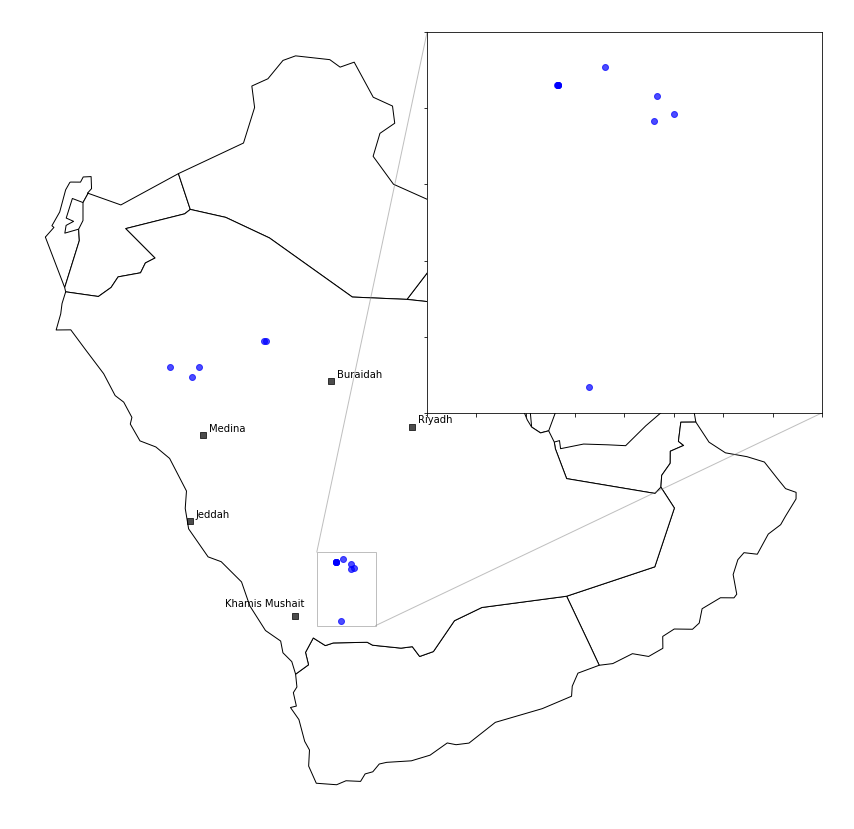

In [6]:
df2 = pd.DataFrame(
    {'City': ['Buraidah', 'Khamis Mushait', 'Riyadh', 'Jeddah', 'Medina', 'Dammam'],
     'Latitude': [26.32599 , 18.329384, 24.774265, 21.543333, 24.470901,  26.396790,],
     'Longitude': [43.97497, 42.759365, 46.738586, 39.172779, 39.612236,  50.140400,]})

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

fig, ax = plt.subplots(figsize=[20,15])
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[(world.name == 'Saudi Arabia')
          | (world.name == 'Israel')
          | (world.name == 'Jordan')
          | (world.name == 'Iraq')
          | (world.name == 'Kuwait')
          | (world.name == 'Qatar')
          | (world.name == 'Bahrain ')
          | (world.name == 'United Arab Emirates')
          | (world.name == 'Oman')
          | (world.name == 'Yemen')].plot( ax=ax, color='white', edgecolor='black')

#world.plot(column='pop_est', ax=ax, legend=True)
gdf.plot(ax=ax, color='blue', marker="o", alpha=0.7)



axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
#axins.axis('off')
#axins.imshow(Z2, extent=extent, interpolation="nearest",
#          origin="lower")



world[(world.name == 'Saudi Arabia')
          | (world.name == 'Israel')
          | (world.name == 'Jordan')
          | (world.name == 'Iraq')
          | (world.name == 'Kuwait')
          | (world.name == 'Qatar')
          | (world.name == 'Bahrain ')
          | (world.name == 'United Arab Emirates')
          | (world.name == 'Oman')
          | (world.name == 'Yemen')].plot(ax=axins, color='white', edgecolor='black')

gdf.plot(ax=axins, color='blue', marker="o", alpha=0.7)

x1, x2, y1, y2 = 43.5, 45.5, 18, 20.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
ax.indicate_inset_zoom(axins)

gdf = geopandas.GeoDataFrame(
    df2, geometry=geopandas.points_from_xy(df2.Longitude, df2.Latitude))

gdf.plot(ax=ax, color='black', marker="s", alpha=0.7)

for x, y, label in zip(df2.Longitude, df2.Latitude, df2.City):
    if label == 'Khamis Mushait':
        ax.annotate(label, xy=(x, y), xytext=(-70, 10), textcoords="offset points")
    else:
        ax.annotate(label, xy=(x, y), xytext=(6, 4), textcoords="offset points")


plt.axis('off')
plt.savefig('sa.pdf')
plt.show()